<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">



<h1 align=center><font size = 5>Linear regression 1-D: Training Two Parameter</font></h1> 

In this lab, you will train a model with Pytorch by using the data that we created. The model will have only one parameter: the slope and bias.

# Table of Contents
In this lab, we will  review how to make a prediction in several different ways by using Pytorch. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data </a></li>
<li><a href="#ref1">Create the Model and Cost Function (total loss) </a></li>
<li><a href="#ref2">Train the Model </a></li>
<li><a href="#ref3">Practice  </a></li>
<br>
<p></p>
Estimated Time Needed: <strong>20 min</strong>
</div>

<hr>

You'll need the following libraries:  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with Pytorch. 

In [2]:
class plot_error_surfaces(object):
    def __init__(self,w_range, b_range,X,Y,n_samples=30,go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z=np.zeros((30,30))
        count1=0
        self.y=Y.numpy()
        self.x=X.numpy()
        for w1,b1 in zip(w,b):
            count2=0
            for w2,b2 in zip(w1,b1):
                Z[count1,count2]=np.mean((self.y-w2*self.x+b2)**2)
                count2 +=1
    
            count1 +=1
        self.Z=Z
        self.w=w
        self.b=b
        self.W=[]
        self.B=[]
        self.LOSS=[]
        self.n=0
        if go==True:
            plt.figure()
            plt.figure(figsize=(7.5,5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
            plt.title('Cost/ Total Loss Surface')

            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/ Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    def get_stuff(self,W,B,loss):
        self.n=self.n+1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
        
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c='r', marker='x',s=200,alpha=1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W,self.B,c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x,self.y,'ro',label="training points")
        plt.plot(self.x,self.W[-1]*self.x+self.B[-1],label="estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: '+str(self.n))
        plt.legend()
        plt.show()
        plt.subplot(122)
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W,self.B,c='r', marker='x')
        plt.title('Total Loss Surface Contour Iteration'+str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.legend()

<a id="ref0"></a>
<h2 align=center>Make Some Data </h2>

Import Pytorch: 

In [3]:
import torch

Generate values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate.

In [4]:
X=torch.arange(-3,3,0.1).view(-1, 1)
w=torch.tensor(-10.0,requires_grad=True)
f=1*X-1

Add some noise to the data:

In [5]:
Y=f+0.1*torch.randn(X.size())

Plot the results:

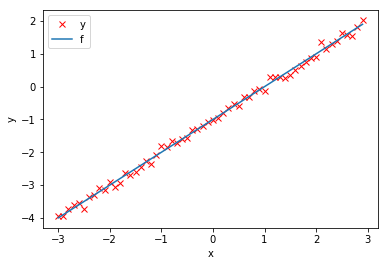

In [6]:
plt.plot(X.numpy(),Y.numpy(),'rx',label='y')
plt.plot(X.numpy(),f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<a id="ref1"></a>
<h2 align=center>Create the Model and Cost Function (total loss) </h2>

Define the forward function: 

In [7]:
def forward(x):
    return w*x+b

Define the cost or criterion function: 

In [8]:
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

<Figure size 432x288 with 0 Axes>

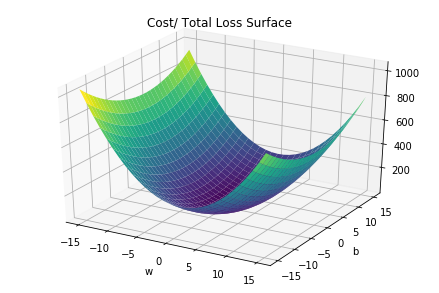

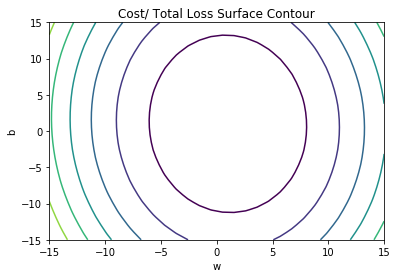

In [9]:
get_surface=plot_error_surfaces(15,15,X,Y,30)

<a id="ref2"></a>
<h2> Train the Model</h2>

Create a model parameter by setting the argument <code>requires_grad<code> to True because the system must  learn it.

In [10]:
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

Set the learning rate 0.1:

In [11]:
lr=0.1

Run 15 iterations of gradient descent: **bug** data space is 1 iteration ahead of parameter space 

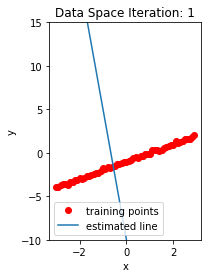

No handles with labels found to put in legend.


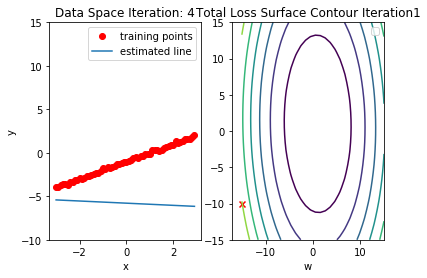

No handles with labels found to put in legend.


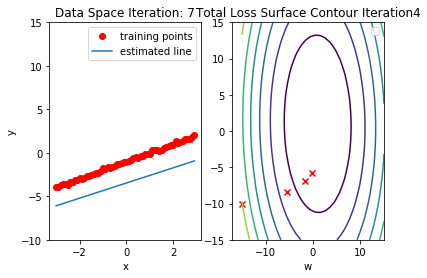

No handles with labels found to put in legend.


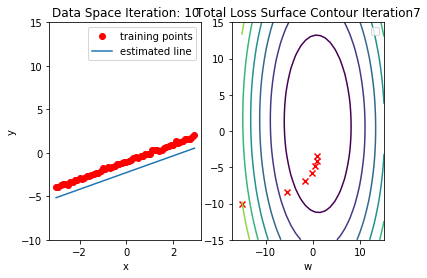

No handles with labels found to put in legend.


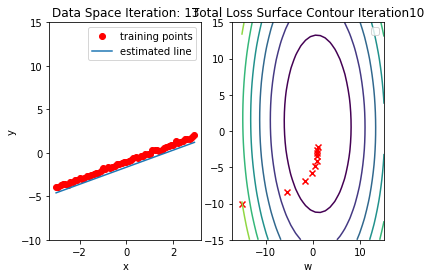

No handles with labels found to put in legend.


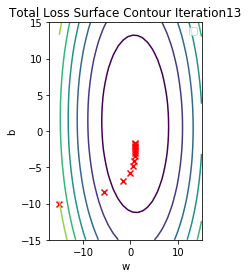

In [12]:
LOSS=[]
for epoch in range(15):
    #make a prediction
    Yhat=forward(X)
    #calculate the loss 
    loss=criterion(Yhat,Y)
    
    #just for ploting 
    #update state of plotting object 
    get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
    if epoch%3==0:
        get_surface.plot_ps()
    #store the total loss in a list 
    LOSS.append(loss)
    #Backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()
    #updata parameters slope
    w.data=w.data-lr*w.grad.data
    #updata parameters bias 
    b.data=b.data-lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

Plot total lose/cost surface with loss values for different parameters in red:

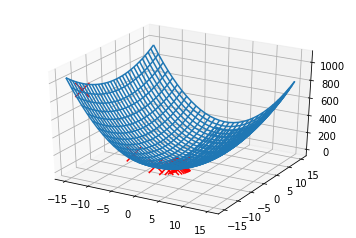

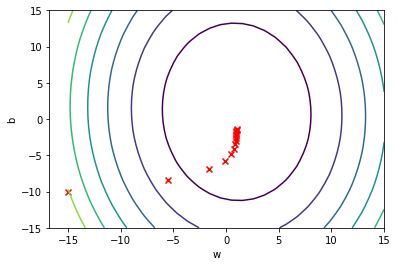

In [13]:
get_surface.final_plot()

Text(24.125,0.5,'Cost')

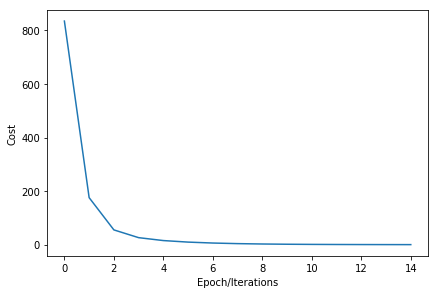

In [14]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<a id="ref3"></a>
<h2>Practice Questions</h2>

#### Experiment with different learning rates and initial parameter values and then run the proceeding cells. 

In [15]:
w=torch.tensor(25.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)
lr=0.1

<Figure size 432x288 with 0 Axes>

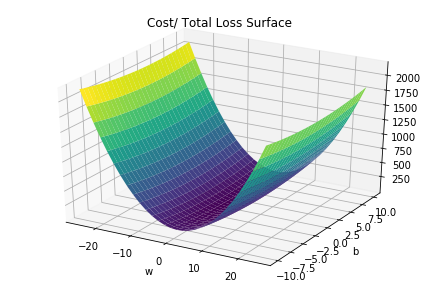

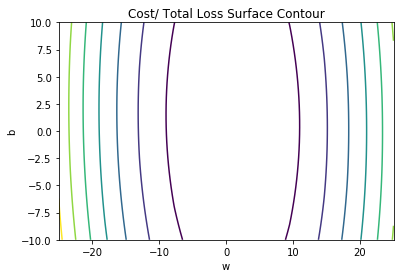

In [16]:
get_surface=plot_error_surfaces(w.data,b.data,X,Y,30)

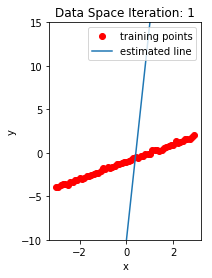

No handles with labels found to put in legend.


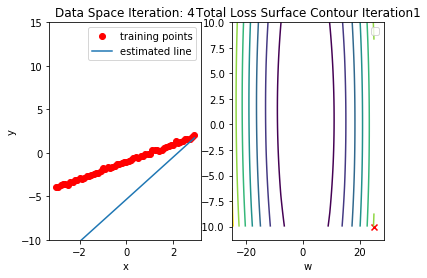

No handles with labels found to put in legend.


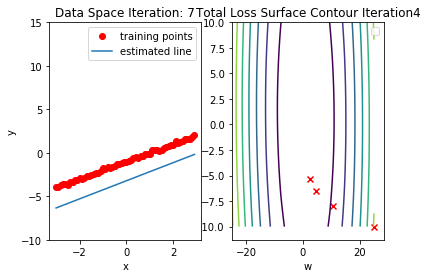

No handles with labels found to put in legend.


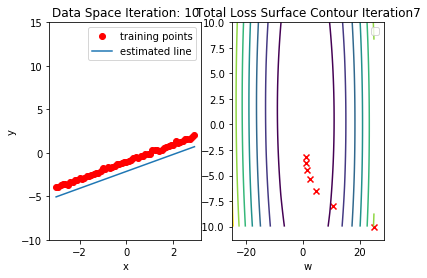

No handles with labels found to put in legend.


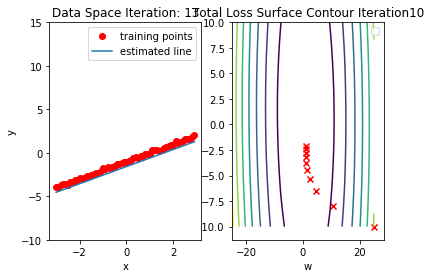

No handles with labels found to put in legend.


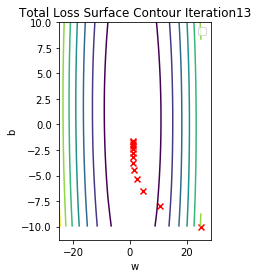

In [17]:
LOSS2=[]
for epoch in range(15):
    #make a prediction
    Yhat=forward(X)
    #calculate the loss 
    loss=criterion(Yhat,Y)
    
    #just for ploting 
    #update state of plotting object 
    get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
    if epoch%3==0:
        get_surface.plot_ps()
    #store the total loss in a list 
    LOSS2.append(loss)
    #Backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()
    #updata parameters slope
    w.data=w.data-lr*w.grad.data
    #updata parameters bias 
    b.data=b.data-lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

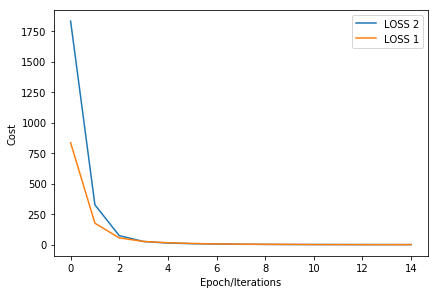

In [18]:
plt.plot(LOSS2,label="LOSS 2")
plt.plot(LOSS,label="LOSS 1")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()

### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering.  His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working fo

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/) 

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).